In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

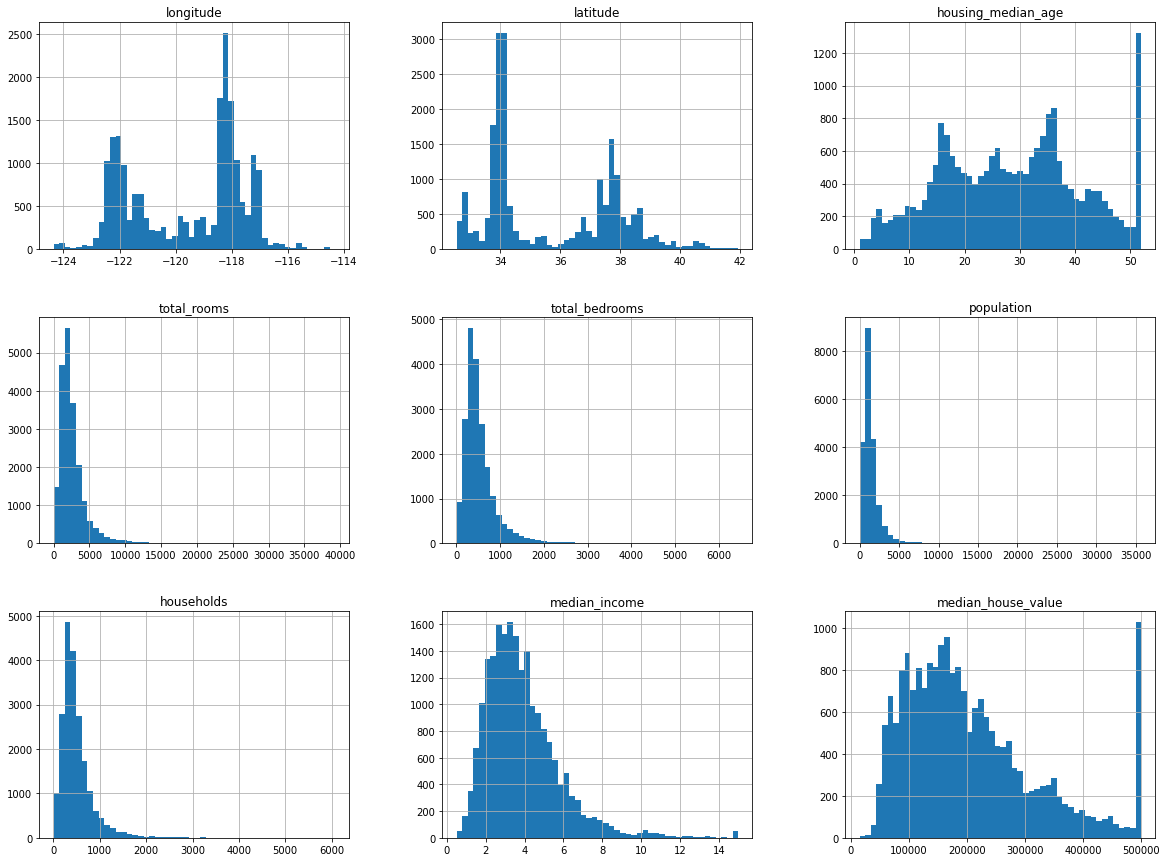

In [6]:
data.hist(bins=50, figsize=(20,15))

## Missing data

In [7]:
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/total 
        
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.plot(kind='bar',y='Total',figsize=(10,6),fontsize=20)
    print(missing_data)

                    Total  Percent
total_bedrooms        207      1.0
longitude               0      NaN
latitude                0      NaN
housing_median_age      0      NaN
total_rooms             0      NaN
population              0      NaN
households              0      NaN
median_income           0      NaN
median_house_value      0      NaN
ocean_proximity         0      NaN


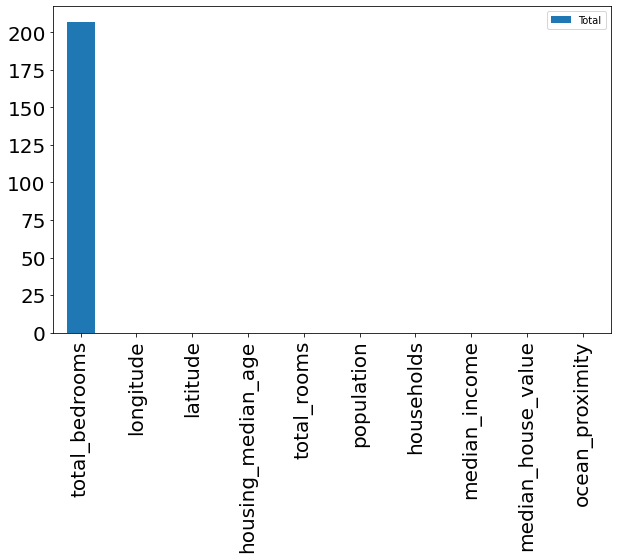

In [8]:
report_missing_data(data)

In [9]:
missing_features = ['total_bedrooms']

In [10]:
for missing_feature in missing_features:
    median=data[missing_feature].median()
    data[missing_feature]=data[missing_feature].replace(np.nan,median)
    data[missing_feature].isnull().sum()

## Attribute Combination

The total rooms in a particular district is not much related to the house price if the population is not specified. The more relevant variable for the house price is the number of people in a house. Therefore, one may introduce a new attribute population_per_household.

In [11]:
data['population_per_household'] = data['population']/data['households']

In addition, the number of rooms per household and bedrooms per rooms are introduced.

In [12]:
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['rooms_per_household'] = data['total_rooms']/data['households']

In [13]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,bedrooms_per_room,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,0.172096,6.281853


/home/bensaid/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population_per_household'>

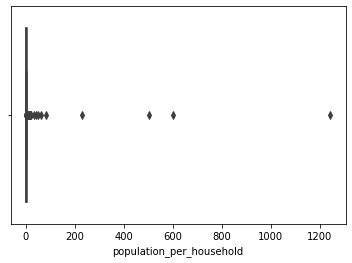

In [14]:
sns.boxplot(data['population_per_household'])

## Outliers


In [15]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [16]:
def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 1000000):
            break

        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
    return df_in

In [17]:
attributes = data.columns.values.tolist()
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'population_per_household',
 'bedrooms_per_room',
 'rooms_per_household']

In [18]:
for k in range(100): #In case some outliers remain
    for attribute in attributes:
        if(attribute!='ocean_proximity'):
            data = remove_all_outliers(data,attribute)

/home/bensaid/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

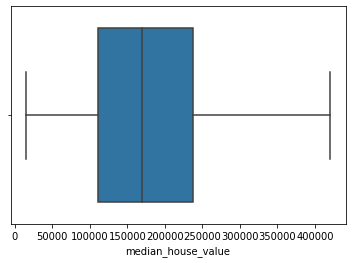

In [22]:
sns.boxplot(data['median_house_value'])

In [23]:
data.shape

(14090, 13)

## Separation between training and test dataset

add a new categorical feature in order to evaluate the splitting properly. This new feature will be deleted afterwards.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5, 5, inplace=True)

(array([ 490.,    0., 4712.,    0.,    0., 5413.,    0., 2671.,    0.,
         804.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

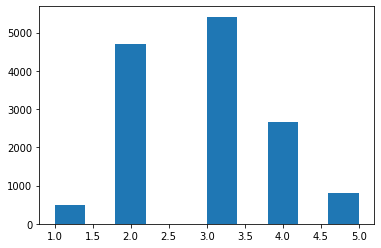

In [26]:
plt.hist(data.income_cat)

In [27]:
data.income_cat.value_counts()/len(data.income_cat)

3.0    0.384173
2.0    0.334422
4.0    0.189567
5.0    0.057062
1.0    0.034776
Name: income_cat, dtype: float64

In [28]:
train_set,test_set = train_test_split(data, test_size=0.2, random_state=42)

In [29]:
def table4income_cat(dataset,df,label):
    df[label]=pd.Series(dataset['income_cat'].value_counts()/len(dataset['income_cat']))
    return df

In [30]:
df = pd.DataFrame()
df = table4income_cat(data,df,'All_set')
df = table4income_cat(train_set,df,'train_set_split')
df = table4income_cat(test_set,df,'test_set_split')
df

,All_set,train_set_split,test_set_split
3.0,0.384173,0.381388,0.395316
2.0,0.334422,0.334546,0.333925
4.0,0.189567,0.193222,0.174947
5.0,0.057062,0.055979,0.061391
1.0,0.034776,0.034865,0.034422


The income category propotions in train data and test data are closer to that in the all dataset.

After split the data into train and test, we delete the newly added feature.

In [33]:
# delete the new feature
for set_ in (data, train_set, test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [34]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,bedrooms_per_room,rooms_per_household
12239,-116.93,33.73,13.0,3603.0,573.0,1644.0,515.0,4.0433,132300.0,INLAND,3.192233,0.159034,6.996117
11150,-117.97,33.84,34.0,874.0,153.0,549.0,153.0,4.8667,186800.0,<1H OCEAN,3.588235,0.175057,5.712418
14086,-117.09,32.77,38.0,2065.0,374.0,812.0,343.0,3.1250,216500.0,NEAR OCEAN,2.367347,0.181114,6.020408
17550,-121.87,37.35,52.0,1557.0,424.0,1580.0,434.0,2.3277,183700.0,<1H OCEAN,3.640553,0.272319,3.587558
3896,-118.50,34.21,35.0,1668.0,332.0,807.0,311.0,4.5125,200300.0,<1H OCEAN,2.594855,0.199041,5.363344


## Separation between inputs and outputs

In [35]:
X_train = train_set.drop("median_house_value",axis=1)
y_train = train_set["median_house_value"].copy()

In [36]:
X_train.shape,y_train.shape

((11272, 12), (11272,))

In [38]:
X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()

## Categorical data with one-hot encoding

In [39]:
X_train['ocean_proximity'].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [40]:
housing_num = X_train.drop("ocean_proximity",axis=1)
num_attribs = list(housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'population_per_household',
 'bedrooms_per_room',
 'rooms_per_household']

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import FeatureUnion
#CategoricalEncoder(encoding='onehot-dense')


from sklearn.base import BaseEstimator,TransformerMixin
#select columns and transit to array

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
        
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_names):
        self.feature_names = feature_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.feature_names].values
    

# build pipelines
cat_attribs = ['ocean_proximity']
num_attribs = list(housing_num)

num_pipeline = Pipeline([
               ('selector',DataFrameSelector(num_attribs)),      
               ('robust_scaler',RobustScaler()), 
                ]) 

# build categorical pipeline
cat_pipeline = Pipeline([
                  ('selector',DataFrameSelector(cat_attribs)),
                  ('cat_encoder',CategoricalEncoder(encoding='onehot-dense')),
              ])


# concatenate all the transforms using "FeatureUnion"
pipelines = FeatureUnion(transformer_list=
                             [ 
                              ('num_pipeline',num_pipeline),
                              ('cat_pipeline',cat_pipeline),
                             ])

In [42]:
transformer = pipelines.fit(X_train)

In [43]:
X_train_prepared = transformer.transform(X_train)
X_test_prepared = transformer.transform(X_test)

In [44]:
X_train.shape

(11272, 12)

In [45]:
X_train_prepared.shape

(11272, 16)

In [48]:
X_test_prepared.shape

(2818, 16)

In [49]:
minY = np.min(y_train)
maxY = np.max(y_train)

y_train = (y_train-minY)/(maxY-minY)
y_test = (y_test-minY)/(maxY-minY)

In [50]:
print(np.min(y_test))
print(np.max(y_test))

0.044929536090999526
1.0004937040392397


In [51]:
np.savetxt('california_inputs_train.csv', X_train_prepared, delimiter=",")
np.savetxt('california_outputs_train.csv', y_train, delimiter=",")
np.savetxt('california_inputs_test.csv', X_test_prepared, delimiter=",")
np.savetxt('california_outputs_test.csv', y_test, delimiter=",")